# Astra to Bmad interface

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

%pylab --no-import-all inline
%config InlineBackend.figure_format = 'retina'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from astra import Astra

from astra.interfaces.bmad import bmad_cavity, bmad_solenoid

from distgen import Generator

import os

In [3]:
# Input template file 
ASTRA_IN = '../templates/sc_inj/astra.in'
DISTGEN_IN ='../templates/sc_inj/distgen.yaml'

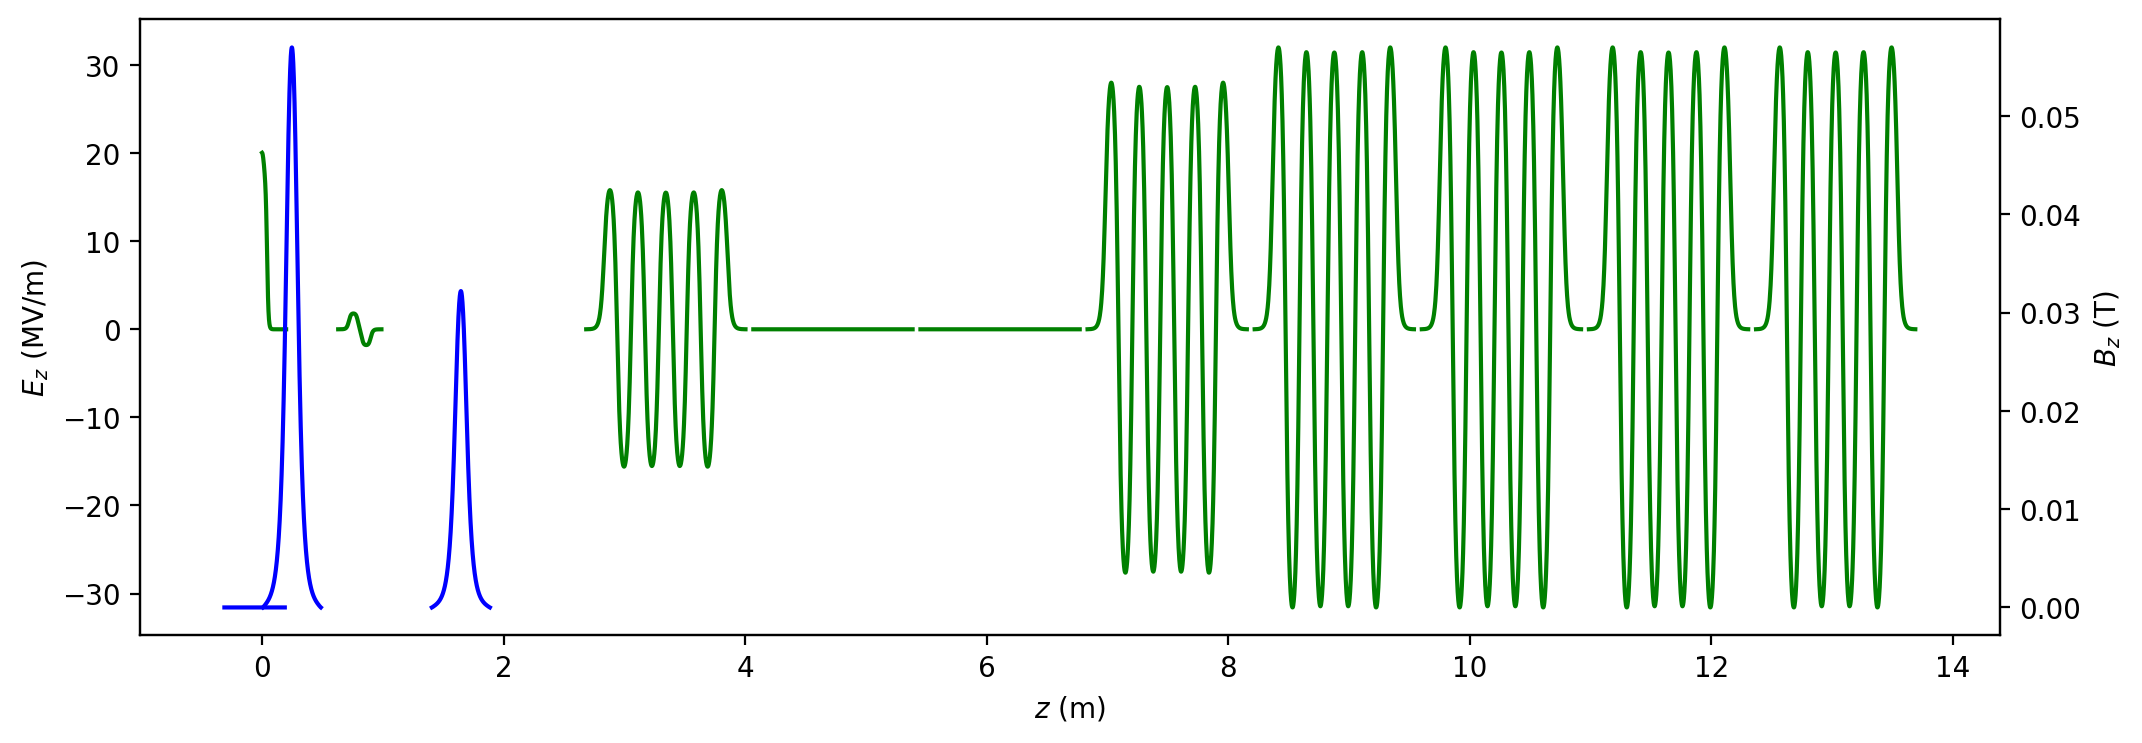

In [4]:
A = Astra(ASTRA_IN)
A.load_fieldmaps()
A.plot()

# Cavities

In [5]:
?bmad_cavity

In [6]:
from astra.fieldmaps import find_fieldmap_ixlist

In [7]:
# Get indices for cavities
ixlist = sorted(find_fieldmap_ixlist(A.input, section='cavity'))

line1 = bmad_cavity(A, 1, keyword='e_gun', ele_origin='beginning')['line']

print(line1)

CAV1: e_gun,
      rf_frequency = 187000000.0,
      phi0 = -0.018321944444444446,
      autoscale_amplitude = False,
      field_autoscale = 20040000.0,
      L = 0.199,
      offset = 0,
      superimpose = True,
      ele_origin = beginning


In [8]:
# The remaining are LCAVITY elements
for ix in ixlist:
    print(bmad_cavity(A, ix)['line'], '\n')

CAV1: lcavity,
      rf_frequency = 187000000.0,
      phi0 = -0.018321944444444446,
      autoscale_amplitude = False,
      field_autoscale = 20040000.0,
      L = 0.199,
      offset = 0,
      superimpose = True,
      ele_origin = center 

CAV2: lcavity,
      rf_frequency = 1300000000.0,
      phi0 = -0.22298472222222224,
      autoscale_amplitude = False,
      field_autoscale = 1794200.0,
      L = 0.358133,
      offset = 0.809116,
      superimpose = True,
      ele_origin = center 

CAV3: lcavity,
      rf_frequency = 1300000000.0,
      phi0 = -0.011111111111111112,
      autoscale_amplitude = False,
      field_autoscale = 15800000.0,
      L = 1.318798,
      offset = 3.3428,
      superimpose = True,
      ele_origin = center 

CAV4: lcavity,
      rf_frequency = 1300000000.0,
      phi0 = 0.0,
      voltage = 0,
      L = 1.318798,
      offset = 4.7264,
      superimpose = True,
      ele_origin = center 

CAV5: lcavity,
      rf_frequency = 1300000000.0,
      phi0 = 

# Solenoids

In [9]:
# Solenoids
ixlist2 = sorted(find_fieldmap_ixlist(A.input, section='solenoid'))

for ix in ixlist2:
    print(bmad_solenoid(A, ix)['line']  )

SOL1: solenoid,
  ! B_max = 0 T
! \int B dL = B_max * 0.11722587420824254 m
! \int B^2 dL = B_max^2 * 0.08506403768280266 m
! Hard edge L = 0.16154776987108496 m
! Hard edge B = 0.0 T,
      L = 0.5,
      superimpose = True,
      ele_origin = center,
      offset = -0.062
SOL2: solenoid,
  ! B_max = 0.057 T
! \int B dL = B_max * 0.12896517423475376 m
! \int B^2 dL = B_max^2 * 0.08623994625099243 m
! Hard edge L = 0.19285745050205194 m
! Hard edge B = 0.03811631291528844 T,
      L = 0.48,
      superimpose = True,
      ele_origin = center,
      offset = 0.24653
SOL3: solenoid,
  ! B_max = 0.0322 T
! \int B dL = B_max * 0.12896517423475376 m
! \int B^2 dL = B_max^2 * 0.08623994625099243 m
! Hard edge L = 0.19285745050205194 m
! Hard edge B = 0.02153237326091733 T,
      L = 0.48,
      superimpose = True,
      ele_origin = center,
      offset = 1.64581


# Full lattice

In [10]:
def bmad_lattice(astra_object):

    lines = []
    
    zendlist = []
    
        # Cavities
    ixlist = sorted(find_fieldmap_ixlist(astra_object.input, section='cavity'))
    for ix in ixlist:
        dat = bmad_cavity(astra_object, ix)
        #zendlist.append(dat['z_end'])
        line = dat['line']
        lines.append(line)
        
    # Solenoids
    ixlist = sorted(find_fieldmap_ixlist(astra_object.input, section='solenoid'))
    for ix in ixlist:
        dat = bmad_solenoid(astra_object, ix)
        #zendlist.append(dat['z_end'])
        line = dat['line']
        lines.append(line)        
        
        
        
    # drift:
    #zmax = max(zendlist) + 0.01 # Pad a little
    lines.append(f"""
drift0: drift, L = {np.round(10, 9)}

lat: line = (drift0)

""")
    
    return '\n\n'.join(lines)
print(bmad_lattice(A))
    
    



CAV1: lcavity,
      rf_frequency = 187000000.0,
      phi0 = -0.018321944444444446,
      autoscale_amplitude = False,
      field_autoscale = 20040000.0,
      L = 0.199,
      offset = 0,
      superimpose = True,
      ele_origin = center

CAV2: lcavity,
      rf_frequency = 1300000000.0,
      phi0 = -0.22298472222222224,
      autoscale_amplitude = False,
      field_autoscale = 1794200.0,
      L = 0.358133,
      offset = 0.809116,
      superimpose = True,
      ele_origin = center

CAV3: lcavity,
      rf_frequency = 1300000000.0,
      phi0 = -0.011111111111111112,
      autoscale_amplitude = False,
      field_autoscale = 15800000.0,
      L = 1.318798,
      offset = 3.3428,
      superimpose = True,
      ele_origin = center

CAV4: lcavity,
      rf_frequency = 1300000000.0,
      phi0 = 0.0,
      voltage = 0,
      L = 1.318798,
      offset = 4.7264,
      superimpose = True,
      ele_origin = center

CAV5: lcavity,
      rf_frequency = 1300000000.0,
      phi0 = 0.0,